In [13]:
import os
import pandas as pd

file_path  = r'C:\Users\Admin\Documents\CEFERD\Edan.xlsx'

df = pd.read_excel(file_path, engine = 'openpyxl')
print ("Dataset shape", df.shape)
print ("Columns:", df.columns.tolist())
display (df.head())

Dataset shape (119, 16)
Columns: ['PARTICIPANT ID', 'ENROLMENT DATE', 'G', 'GUA', 'POSITION', 'FETAL WEIGHT', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'LOCATION', 'TYPE', 'EDD', 'Unnamed: 14', 'CATEGORY']


,PARTICIPANT ID,ENROLMENT DATE,G,GUA,POSITION,FETAL WEIGHT,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,LOCATION,TYPE,EDD,Unnamed: 14,CATEGORY
0,EDACEF0103,2025-08-06,37W 0D,38W 1D,CEPHALIC,2942.0,2,17.05,6.98,NO,0.68,POSTERIOR,NORMAL,2025-08-27,3,TWIN A
1,EDACEF0103,2025-08-06,37W 0D,38W 1D,CEPHALIC,3406.0,2,17.08,5.71,NO,0.68,ANTERIOR,NORMAL,2025-08-27,3,TWIN B
2,EDACEF0104,2025-08-07,30W 3D,33W 6D,CEPHALIC,2296.0,2,14.47,3.87,NO,0.57,FUNDAL,NORMAL,2025-10-13,3,TWIN A
3,EDACEF0104,2025-08-07,30W 3D,33W 6D,BREECH,2175.0,2,15.76,5.92,NO,0.56,FUNDAL,NORMAL,2025-10-13,3,TWIN B
4,EDACEF0105,2025-08-07,25W 1D,24W 0D,CEPHALIC,647.0,2,15.79,6.48,NO,0.77,POSTERIOR,NORMAL,2025-11-19,2,TWIN A


In [10]:
import os
import pandas as pd


file_path = r'C:\Users\Admin\Documents\CEFERD\Edan.xlsx'  

print("Checking if file exists...")
if os.path.exists(file_path):
    print("YES - File found!")
    df = pd.read_excel(file_path, engine='openpyxl')
    print("\nSuccess! Dataset shape:", df.shape)
    print("Columns:", df.columns.tolist())
    display(df.head())   # nicer view in Jupyter
else:
    print("NO - File NOT found at:", file_path)
    print("Current working directory:", os.getcwd())
    print("Try these common locations:")
    common_paths = [
        r'C:\Users\Admin\Desktop\Edan.xlsx',
        r'C:\Users\Admin\Downloads\Edan.xlsx',
        r'C:\Users\Admin\Documents\Edan.xlsx',
    ]
    for p in common_paths:
        if os.path.exists(p):
            print("Found it here →", p)

Checking if file exists...
YES - File found!

Success! Dataset shape: (119, 16)
Columns: ['PARTICIPANT ID', 'ENROLMENT DATE', 'G', 'GUA', 'POSITION', 'FETAL WEIGHT', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'LOCATION', 'TYPE', 'EDD', 'Unnamed: 14', 'CATEGORY']


,PARTICIPANT ID,ENROLMENT DATE,G,GUA,POSITION,FETAL WEIGHT,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,LOCATION,TYPE,EDD,Unnamed: 14,CATEGORY
0,EDACEF0103,2025-08-06,37W 0D,38W 1D,CEPHALIC,2942.0,2,17.05,6.98,NO,0.68,POSTERIOR,NORMAL,2025-08-27,3,TWIN A
1,EDACEF0103,2025-08-06,37W 0D,38W 1D,CEPHALIC,3406.0,2,17.08,5.71,NO,0.68,ANTERIOR,NORMAL,2025-08-27,3,TWIN B
2,EDACEF0104,2025-08-07,30W 3D,33W 6D,CEPHALIC,2296.0,2,14.47,3.87,NO,0.57,FUNDAL,NORMAL,2025-10-13,3,TWIN A
3,EDACEF0104,2025-08-07,30W 3D,33W 6D,BREECH,2175.0,2,15.76,5.92,NO,0.56,FUNDAL,NORMAL,2025-10-13,3,TWIN B
4,EDACEF0105,2025-08-07,25W 1D,24W 0D,CEPHALIC,647.0,2,15.79,6.48,NO,0.77,POSTERIOR,NORMAL,2025-11-19,2,TWIN A


In [14]:
import pandas as pd

#load the file
df = pd.read_excel (r'C:\Users\Admin\Documents\CEFERD\Edan.xlsx')

#1. Strip any leading/trailing spaces in column names and data
df.columns = df.columns.str.strip()

#2. Rename the unnamed columns
rename_dict = {
    'Unnamed: 6': 'Number of fetuses',
    'Unnamed: 7': 'BPD_cm',
    'Unnamed: 8': 'HC_cm',
    'Unnamed: 9': 'Cord around Neck',
    'Unnamed: 10': 'Amniotic Fluid Index',
    'Unnamed: 14': 'Trimester',
}

df = df.rename(columns=rename_dict)

#3. Dropoing completely empty columns
df = df.dropna(axis=1, how='all')

#4. Convert dates to proper datetime
date_cols = ['ENROLMENT DATE', 'EDD']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

#5. Clean gestational age columns
def extract_ga_days(ga_str):
    if pd.isna(ga_str):
        return None

df['GA_scan_days'] = df['G'].apply(extract_ga_days)
df['GA_ua_days'] = df['GUA'].apply(extract_ga_days)

#6. Strip spaces from colums
str_cols = ['PARTICIPANT ID', 'G', 'GUA', 'POSITION', 'LOCATION', 'TYPE', 'CATEGORY']
for col in str_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

#7. Final touches
df = df.sort_values(['PARTICIPANT ID', 'CATEGORY'])

print("Cleaned dataset shape:", df.shape)
print("\nCleaned colums:", df.columns.tolist())
print("\nFirst 5 rows after cleaning:")
print(df.head().to_string(index=False))
        
        

Cleaned dataset shape: (119, 18)

Cleaned colums: ['PARTICIPANT ID', 'ENROLMENT DATE', 'G', 'GUA', 'POSITION', 'FETAL WEIGHT', 'Number of fetuses', 'BPD_cm', 'HC_cm', 'Cord around Neck', 'Amniotic Fluid Index', 'LOCATION', 'TYPE', 'EDD', 'Trimester', 'CATEGORY', 'GA_scan_days', 'GA_ua_days']

First 5 rows after cleaning:
PARTICIPANT ID ENROLMENT DATE      G    GUA POSITION  FETAL WEIGHT  Number of fetuses  BPD_cm  HC_cm Cord around Neck  Amniotic Fluid Index  LOCATION   TYPE        EDD  Trimester CATEGORY GA_scan_days GA_ua_days
    EDACEF0103     2025-08-06 37W 0D 38W 1D CEPHALIC        2942.0                  2   17.05   6.98               NO                  0.68 POSTERIOR NORMAL 2025-08-27          3   TWIN A         None       None
    EDACEF0103     2025-08-06 37W 0D 38W 1D CEPHALIC        3406.0                  2   17.08   5.71               NO                  0.68  ANTERIOR NORMAL 2025-08-27          3   TWIN B         None       None
    EDACEF0104     2025-08-07 30W 3D 33W 

In [15]:
df.to_excel(r'C:\Users\Admin\Documents\CEFERD\Edan_cleaned.xlsx', index= False)

In [17]:
#Shows ALL rows
pd.set_option('display.max_rows', None)

#Makkes columns wider
pd.set_option('display.max_colwidth', None)
df

,PARTICIPANT ID,ENROLMENT DATE,G,GUA,POSITION,FETAL WEIGHT,Number of fetuses,BPD_cm,HC_cm,Cord around Neck,Amniotic Fluid Index,LOCATION,TYPE,EDD,Trimester,CATEGORY,GA_scan_days,GA_ua_days
0,EDACEF0103,2025-08-06,37W 0D,38W 1D,CEPHALIC,2942.0,2,17.05,6.98,NO,0.68,POSTERIOR,NORMAL,2025-08-27,3,TWIN A,None,None
1,EDACEF0103,2025-08-06,37W 0D,38W 1D,CEPHALIC,3406.0,2,17.08,5.71,NO,0.68,ANTERIOR,NORMAL,2025-08-27,3,TWIN B,None,None
2,EDACEF0104,2025-08-07,30W 3D,33W 6D,CEPHALIC,2296.0,2,14.47,3.87,NO,0.57,FUNDAL,NORMAL,2025-10-13,3,TWIN A,None,None
3,EDACEF0104,2025-08-07,30W 3D,33W 6D,BREECH,2175.0,2,15.76,5.92,NO,0.56,FUNDAL,NORMAL,2025-10-13,3,TWIN B,None,None
4,EDACEF0105,2025-08-07,25W 1D,24W 0D,CEPHALIC,647.0,2,15.79,6.48,NO,0.77,POSTERIOR,NORMAL,2025-11-19,2,TWIN A,None,None
5,EDACEF0105,2025-08-07,25W 1D,24W 0D,BREECH,608.0,2,18.62,6.79,NO,0.70,ANTERIOR,NORMAL,2025-11-19,2,TWIN B,None,None
6,EDACEF0106,2025-08-07,23W 1D,27W 4D,BREECH,1096.0,1,29.98,11.26,NO,0.71,ANTERIOR,NORMAL,2025-12-03,1,Polyhydramnios,None,None
7,EDACEF0107,2025-08-08,28W 5D,29W 1D,BREECH,1189.0,2,15.41,5.38,NO,0.67,POSTERIOR,NORMAL,2025-10-26,3,TWIN A,None,None
8,EDACEF0107,2025-08-08,28W 5D,29W 1D,BREECH,1324.0,2,11.98,3.79,NO,0.67,POSTERIOR,NORMAL,2025-10-26,3,TWIN B,None,None
9,EDACEF0108,2025-08-11,22W 1D,23W0D,CEPHALIC,554.0,2,15.36,4.52,NO,0.75,ANTERIOR,NORMAL,2025-12-14,2,TWIN A,None,None


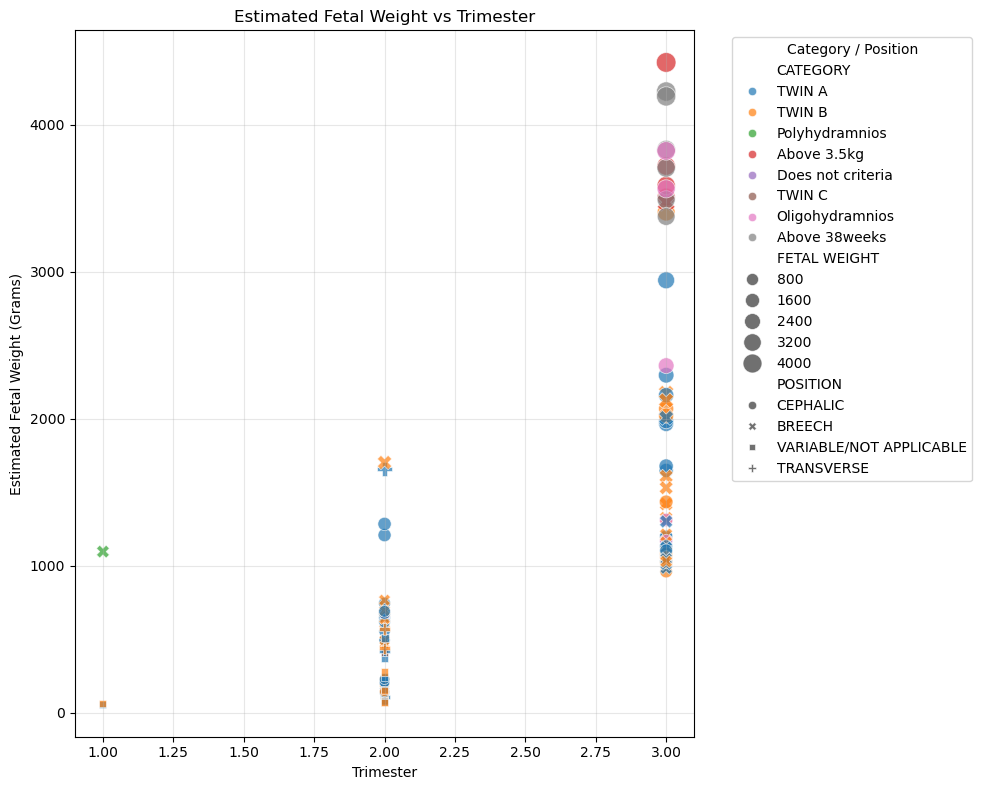

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

sns.scatterplot(
    data=df,
    x='Trimester',
    y='FETAL WEIGHT',
    hue='CATEGORY',
    style='POSITION',
    size='FETAL WEIGHT',
    sizes=(50, 200),
    alpha=0.7

)

plt.title('Estimated Fetal Weight vs Trimester')
plt.xlabel('Trimester')
plt.ylabel('Estimated Fetal Weight (Grams)')
plt.grid(True, alpha=0.3)
plt.legend(title='Category / Position', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9040\2218458975.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


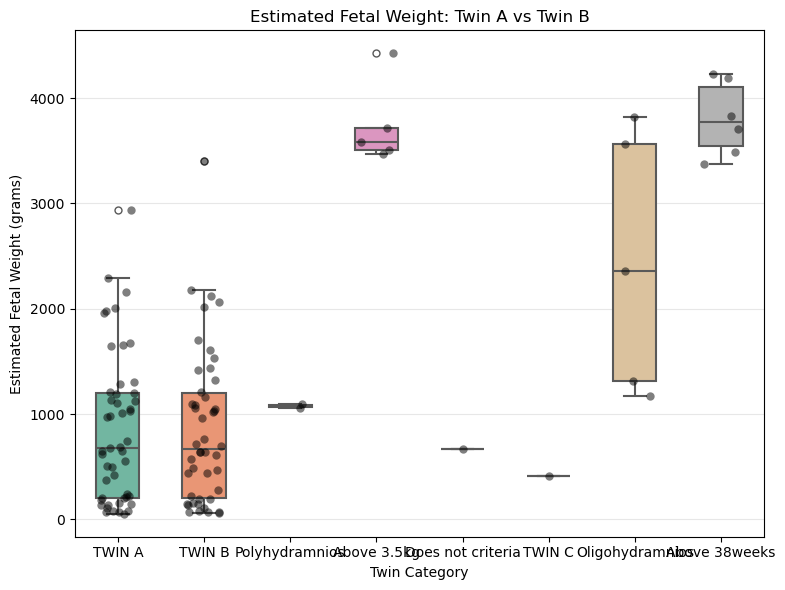

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (8,6))

sns.boxplot(
    data=df,
    x='CATEGORY',
    y='FETAL WEIGHT',
    palette= 'Set2',
    width=0.5,
    fliersize=5,
    linewidth=1.5
)

sns.stripplot(
    data=df,
    x='CATEGORY',
    y='FETAL WEIGHT',
    color='black',
    alpha=0.5,
    jitter=0.2,
    size=6,
    dodge=True
)

plt.title('Estimated Fetal Weight: Twin A vs Twin B')
plt.xlabel('Twin Category')
plt.ylabel('Estimated Fetal Weight (grams)')
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()